<a href="https://colab.research.google.com/github/gamodilac/roboticHW/blob/main/W4_BT_ST2_fuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6dcc9a39c97a5dbc6511dc74158525a1497d5b4edf80615c35321b38236e422c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,5001,1),'rice')
power = ctrl.Consequent(np.arange(20,101,1),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[20,35,50])
time['medium'] = fuzz.trimf(time.universe,[20,50,150])
time['slow'] = fuzz.trimf(time.universe,[90,150,250])
time['very slow'] = fuzz.trimf(time.universe,[150,175,300])


rice['very little'] = fuzz.trimf(rice.universe,[100,100,250])
rice['little'] = fuzz.trimf(rice.universe,[150,500,750])
rice['average'] = fuzz.trimf(rice.universe,[750,1500,2500])
rice['much'] = fuzz.trimf(rice.universe,[2000,3000,4000])
rice['very much'] = fuzz.trimf(rice.universe,[3500,4000,5000])

power['cozy'] = fuzz.trimf(power.universe,[20,20,40])
power['warm'] = fuzz.trimf(power.universe,[20,40,60])
power['hot'] = fuzz.trimf(power.universe,[40,60,80])
power['very hot'] = fuzz.trimf(power.universe,[60,80,100])
power['flaming hot'] = fuzz.trimf(power.universe,[80,100,100])


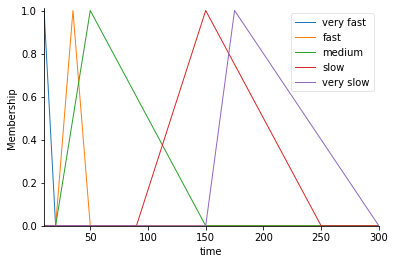

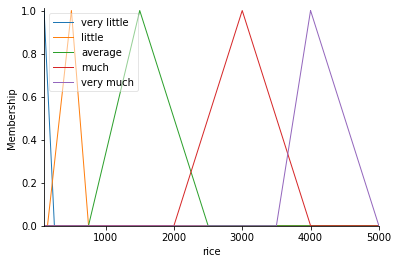

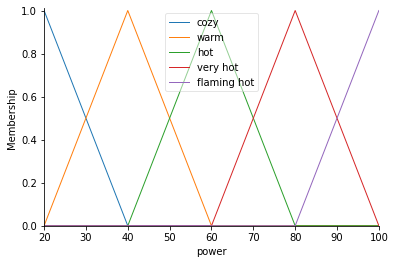

In [12]:
time.view()
rice.view()
power.view()

In [18]:
rule_1 = ctrl.Rule(time['very fast']&rice['very little'],power['cozy'])
rule_2 = ctrl.Rule(time['very fast']&rice['little'],power['warm'])
rule_3 = ctrl.Rule(time['very fast']&rice['average'],power['hot'])
rule_4 = ctrl.Rule(time['very fast']&rice['much'],power['very hot'])
rule_5 = ctrl.Rule(time['very fast']&rice['very much'],power['flaming hot'])

rule_6 = ctrl.Rule(time['fast']&rice['very little'],power['cozy'])
rule_7 = ctrl.Rule(time['fast']&rice['little'],power['warm'])
rule_8 = ctrl.Rule(time['fast']&rice['average'],power['hot'])
rule_9 = ctrl.Rule(time['fast']&rice['much'],power['very hot'])
rule_10 = ctrl.Rule(time['fast']&rice['very much'],power['flaming hot'])

rule_11 = ctrl.Rule(time['medium']&rice['very little'],power['cozy'])
rule_12 = ctrl.Rule(time['medium']&rice['little'],power['cozy'])
rule_13 = ctrl.Rule(time['medium']&rice['average'],power['warm'])
rule_14 = ctrl.Rule(time['medium']&rice['much'],power['hot'])
rule_15 = ctrl.Rule(time['medium']&rice['very much'],power['hot'])

rule_16 = ctrl.Rule(time['slow']&rice['very little'],power['cozy'])
rule_17 = ctrl.Rule(time['slow']&rice['little'],power['cozy'])
rule_18 = ctrl.Rule(time['slow']&rice['average'],power['warm'])
rule_19 = ctrl.Rule(time['slow']&rice['much'],power['warm'])
rule_20 = ctrl.Rule(time['slow']&rice['very much'],power['hot'])

rule_21 = ctrl.Rule(time['very slow']&rice['very little'],power['cozy'])
rule_22 = ctrl.Rule(time['very slow']&rice['little'],power['cozy'])
rule_23 = ctrl.Rule(time['very slow']&rice['average'],power['cozy'])
rule_24 = ctrl.Rule(time['very slow']&rice['much'],power['warm'])
rule_25 = ctrl.Rule(time['very slow']&rice['very much'],power['warm'])

40.0


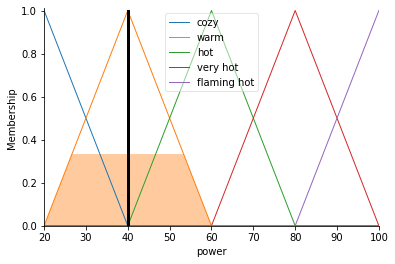

In [20]:
powering_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 100      #10-300 min
powering.input['rice'] = 1000      #100 - 5000 g
powering.compute()
print(tipping.output['power'])
power.view(sim = tipping)